In [ ]:
#student performance prediction regression problem.

In [ ]:
import pandas as pd
import numpy  as np

Data prepartion

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)
type(student_performance)

ucimlrepo.dotdict.dotdict

In [ ]:
X = student_performance.data.features
y = student_performance.data.targets
df=pd.concat([X,y],axis=1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
df.columns=df.columns.str.lower().str.replace(" ","_")
df.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
df.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
col =df.dtypes[df.dtypes == "object"].index
for col in col :
    df[col]=df[col].str.lower().str.replace(" ","_")

In [ ]:
df.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,gp,f,18,u,gt3,a,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,gp,f,17,u,gt3,t,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,gp,f,15,u,le3,t,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,gp,f,15,u,gt3,t,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,gp,f,16,u,gt3,t,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
df.dtypes

,0
school,object
sex,object
age,int64
address,object
famsize,object
pstatus,object
medu,int64
fedu,int64
mjob,object
fjob,object


DO EXPLANATORY DATA ANALIYSIS

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='g1', ylabel='Count'>

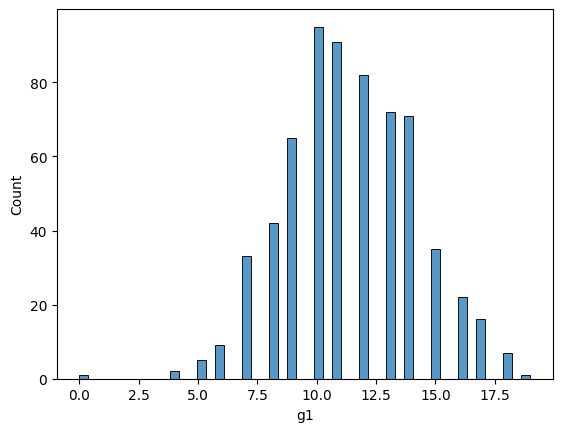

In [ ]:
sns.histplot(df.g1,bins=50)

<Axes: xlabel='g1', ylabel='Count'>

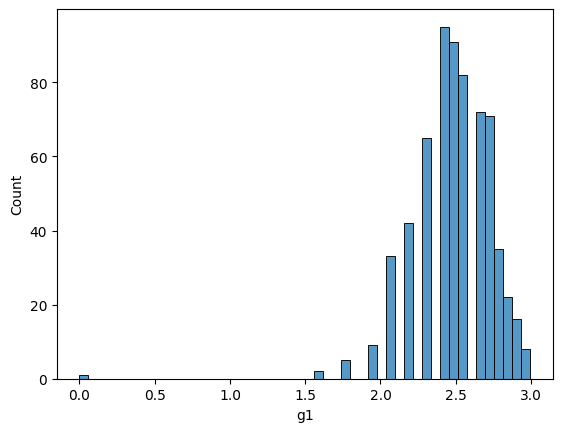

In [ ]:
grade2=np.log1p(df.g1)
sns.histplot(grade2,bins=50)

In [ ]:
#the grade distrubtion is good it is not skewed or long tail if it were it is advisable to take its log but for now we could do it with a normal values but let us use its log value

In [ ]:
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
pstatus,0
medu,0
fedu,0
mjob,0
fjob,0


setting up the validation frame work

In [ ]:
n=len(df)
#first step is to know what is the length of the data frame in order to classify the data set in to train,val,test data set in percent.


In [ ]:
n_test=int(0.2*n)
n_val=int(0.2*n)
n_train=n-(n_test+n_val)

In [ ]:
#then we could do use the above numbers and specify them as an index to our data frame and get the data set for train,val,test
#but to make the data random we should have to shuffle the index of the data frame
ind=np.arange(n)
np.random.seed(2)#these helps to reproduce every randomness
np.random.shuffle(ind)
ind

array([ 37, 440, 397, 344, 248, 176, 395, 452, 158,  89,   1, 581, 165,
       141, 275, 508, 637, 556, 321, 459, 467, 205, 639,  30, 569, 559,
       515, 249, 209,  55,  80, 294, 333, 350, 192, 109,  22, 161,  18,
       329, 438, 511, 435, 312, 304, 393,  68,  67, 340, 614, 300, 322,
       605, 267, 338, 444,  84, 465, 331, 595, 458, 566, 523, 128, 183,
       503, 129, 193, 226, 180, 311, 108, 288, 568, 355, 251, 107, 130,
       551, 479,  32, 172, 142, 472, 295, 586, 369, 475,  16, 402, 492,
       428,  10, 280, 621,  62, 504, 512,  13, 223, 265, 576, 330,  40,
       152,  65, 522,  72, 600, 363, 284, 598, 235, 384,  77, 619, 199,
       601, 460, 429, 120, 471, 510, 463,   3, 575, 244, 116, 307, 403,
       494, 377, 604, 464, 123, 394, 178, 451, 258, 182, 518, 250, 134,
       239, 232, 157,  60, 221, 389, 396, 572, 495, 212, 413, 131,  58,
       334, 315, 416, 297, 542, 171, 146,  53, 136, 236, 549, 443, 227,
       345, 629, 519,  66, 281,  52, 615, 541, 365, 117,  28, 47

In [ ]:
df_train=df.iloc[ind[:n_train]]
df_test=df.iloc[ind[n_train:n_train+n_test]]
df_val=df.iloc[ind[n_train+n_test:]]

In [ ]:
df_train.reset_index(drop=True)
df_test.reset_index(drop=True)
df_val.reset_index(drop=True)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,gp,f,16,u,le3,t,2,4,other,health,...,4,2,2,1,2,5,2,14,12,13
1,ms,f,17,u,gt3,a,1,1,at_home,at_home,...,4,5,5,1,2,3,2,11,10,11
2,ms,f,16,u,le3,t,2,1,other,services,...,3,2,2,1,1,3,0,14,15,16
3,gp,m,19,u,gt3,t,4,2,health,other,...,5,4,4,1,1,1,9,11,10,10
4,gp,m,18,u,gt3,t,4,2,teacher,other,...,4,3,2,1,4,5,2,15,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,ms,m,16,u,le3,t,4,4,teacher,health,...,4,1,2,2,5,5,0,11,12,12
125,ms,f,17,r,gt3,t,0,0,at_home,other,...,4,4,3,1,1,5,0,10,11,11
126,ms,f,17,u,gt3,t,0,1,other,at_home,...,2,4,4,3,5,5,5,9,9,10
127,ms,m,16,u,le3,t,2,2,services,services,...,5,1,3,2,2,3,0,10,9,10


In [ ]:
#creating the target variable for our datasets
y_train=df_train.g1.values
y_val=df_val.g1.values
y_test=df_test.g1.values


In [ ]:
#delete these target variables from our data set these will make the feature matrix of our data sets
del df_train['g1']
del df_val['g1']
del df_test['g1']

Training linear regression model

linear regression models are used for a regression problems meaning for a problems where we are expected to predict a number.

linear regression model is g where g is like these g(x)=y where x is a feature matrix and y is the target varible or g(x)=wo+w1*xi1+w2*xi2+... these shows that training a model for linear regression model means trying to  find the wights value from the given training data set. using inverse of matrix concept

In [ ]:
def training_linear_regression(X,y):
    #g(x)=y , g(x)=wo+w1*xi1+w2*xi2+... , so we could write these like these x[matrix].dot with w[matrix]
    #g(x)=x[matrix].y[matrix]
    #so when we say training a linear regression  model which means geting the wight matrix
    #for doing that we could use these normal equation  as these works for most of the cases that is to find wight matrix using matrix multiplication
    #y=x.w ------> y.x-1=x*x-1.w y.x-1=w but these works only for when our feature matrix is a square matrix
    #so we use a gram matrix for doing that we use these both times xT mostly x.xT is a square matrix
    #so the final equation looks like these y.xT.(x.xT)-1=w
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    xtx=(X.T).dot(X)
    xtix=np.linalg.inv(xtx)
    w=xtix.dot(X.T).dot(y)
    return w


In [ ]:
df_train.dtypes

,0
school,object
sex,object
age,int64
address,object
famsize,object
pstatus,object
medu,int64
fedu,int64
mjob,object
fjob,object


In [ ]:
base=["traveltime","studytime","famrel",
"freetime"
,"goout"	,
"dalc"
,"walc","health"
,"absences","failures"]

In [ ]:
df_train[base]

,traveltime,studytime,famrel,freetime,goout,dalc,walc,health,absences,failures
37,2,3,2,4,3,1,1,5,4,0
440,2,2,5,4,5,4,5,3,0,0
397,1,2,3,3,1,1,2,4,18,0
344,1,1,1,4,2,2,2,1,0,0
248,2,2,3,4,2,1,1,5,2,0
...,...,...,...,...,...,...,...,...,...,...
596,2,2,4,3,3,1,2,4,0,0
489,2,1,4,4,3,3,4,4,0,1
186,1,2,4,4,4,1,3,5,0,0
283,3,2,5,3,3,1,3,2,4,1


In [ ]:
x_train=df_train[base].values

In [ ]:
training_linear_regression(x_train,y_train)

array([ 1.25151059e+01, -3.15246726e-01,  5.30163982e-01, -3.39825162e-03,
       -5.45953619e-02, -2.73265795e-02, -3.62277842e-01, -3.51484042e-02,
       -9.28562369e-02, -2.14040790e-02, -1.54873408e+00])

In [ ]:
#let us compare now trained prediction with actual data y_targets value
y_prediction=training_linear_regression(x_train,y_train)[1:].dot(x_train.T)+training_linear_regression(x_train,y_train)[0]
#is our actual value
y_train,y_prediction

(array([13,  7, 10, 18,  9,  8, 12,  9, 11,  9,  9,  6, 13, 14, 12, 10,  7,
         9, 13, 10, 14, 12,  5, 10,  4, 12,  9, 12, 14, 12, 11, 11, 13,  9,
        10, 15, 12,  9,  8, 12, 10, 11, 10, 16, 11, 14, 11, 10, 14, 12, 15,
         9,  5, 15, 18,  9, 13,  9, 12, 17, 13,  9,  5, 14, 16, 14, 13, 11,
        13,  9, 11, 12, 12,  6, 11,  9, 13, 10, 13,  9, 13, 10, 11, 14, 11,
         8, 10, 12, 13, 11,  8,  6, 14, 10, 13, 13, 12,  7, 12, 11, 15,  9,
        12, 11, 12, 16,  8, 13, 12, 11,  7, 10, 12, 11, 13, 13, 11,  8, 11,
        10, 14, 12, 15, 14, 14, 10, 14, 16, 11, 12,  8, 13,  9, 11, 12, 14,
         8, 10, 14, 12,  8, 16, 13,  8, 12, 11, 17, 14, 10, 16,  5, 14, 14,
         9, 10, 14, 14, 14, 16,  9, 10, 12, 10, 13,  9, 13, 17,  7, 12, 14,
         7,  8, 11, 11, 10, 15, 11, 15, 14, 12, 13, 12, 14, 10, 11, 12, 13,
        13, 17,  9,  9,  8, 10, 14, 10,  9, 10, 10, 10, 10, 13,  4, 13, 13,
        14,  8, 11, 10, 11, 13, 10,  9, 10, 16, 11, 12, 13, 10, 12,  8, 11,
        16, 

<Axes: ylabel='Count'>

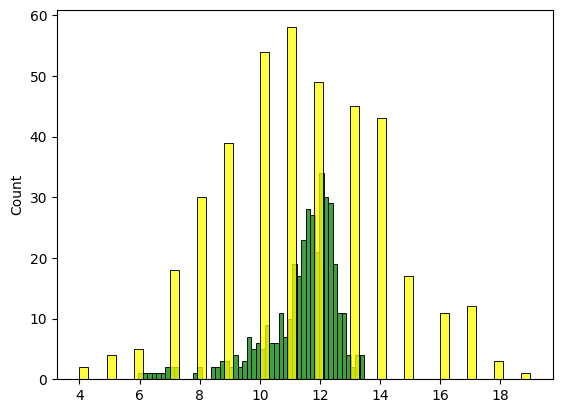

In [ ]:
sns.histplot(y_prediction,color="green",bins=50)
sns.histplot(y_train,color='yellow',bins=50)

finding the root mean sqaure error

In [ ]:
def rmse(y_prediction,y_actual):
    error=y_prediction-y_actual
    square_error=error**2
    mean_square_error=square_error.mean()
    return np.sqrt(mean_square_error)

In [ ]:
rmse(y_prediction,y_train)

np.float64(2.3760964647585467)

we validate our model using the training data set but these is not the right way to do validating data set so we should have to validate our data using a validation dataset so let us do these

In [ ]:
def prepare_x(df):
    x=df[base]
    x=x.fillna(0)
    x=x.values
    return x
x_val=prepare_x(df_val)
y_val_prediction=training_linear_regression(x_train,y_train)[1:].dot(x_val.T)+training_linear_regression(x_train,y_train)[0]

In [ ]:
rmse(y_val_prediction,y_val)

np.float64(2.5707284497835325)

improving our model using simple feature engineering

In [ ]:
 rmse(y_val_prediction,y_val)

np.float64(2.577367792311495)

In [ ]:
#so for doing these let us now add another feature in our training dataset these is that
def prepare_x_added(df):
    df=df.copy()
    #adding a new feature over here
    df["difference"]=df["freetime"]-df["traveltime"]
    feature=base+["difference"]
    x=df[base]

    x=x.fillna(0)
    x=x.values
    return x
x_val=prepare_x(df_val)
y_val_prediction=training_linear_regression(x_train,y_train)[1:].dot(x_val.T)+training_linear_regression(x_train,y_train)[0]

In [ ]:
x_train_added=prepare_x_added(df_train)
x_val_added=prepare_x_added(df_val)
y_val_prediction_added=training_linear_regression(x_train_added,y_train)[1:].dot(x_val_added.T)+training_linear_regression(x_train_added,y_train)[0]

In [ ]:
rmse(y_val_prediction_added,y_val)

np.float64(2.5707284497835325)

In [ ]:
#so the added feature does not improve the model learning these may happen when we use every features that is related with the target variable

categorical variables
    meaning columns that are strings meaning columns that are not used for training purpose

In [ ]:
# def  prepare_x_categorical(df):
#      df=df.copy()
#      for val in ["no","yes"]:
#          df[f"paid%s"%val] = (df["paid"] == val).astype("int")
#      return df

In [ ]:
def prepare_x_added_c(df):
    df=df.copy()
    #adding a new feature over here
    #df["difference"]=df["freetime"]-df["traveltime"]
    for val in ["no","yes"]:
         df[f"paid%s"%val] = (df["internet"] == val).astype("int")
    features=base+["paidno","paidyes"]
    x=df[features]
    x=x.fillna(0)
    x=x.values
    return x

In [ ]:
x_train=prepare_x_added_c(df_train)
x_val=prepare_x_added_c(df_val)
y_val_prediction=training_linear_regression(x_train,y_train)[1:].dot(x_val.T)+training_linear_regression(x_train,y_train)[0]

LinAlgError: Singular matrix

In [ ]:
rmse(y_val_prediction,y_val)

np.float64(2.883414922841906)

In [ ]:
df_train.dtypes

,0
school,object
sex,object
age,int64
address,object
famsize,object
pstatus,object
medu,int64
fedu,int64
mjob,object
fjob,object
